In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.0 MB/s eta 0:00:00


In [3]:
#import praw
from google.colab import drive
import pandas as pd
import datetime as dt

drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Datasci 415 Project')

Mounted at /content/drive


In [150]:
import yfinance as yf
nvda = yf.Ticker("NVDA")
aapl = yf.Ticker("AAPL")
n_statistics = nvda.history(period="6mo")
a_statistics = aapl.history(period="6mo")

In [115]:
import yfinance as yf
amzn = yf.Ticker("AMZN")
google = yf.Ticker("MSFT")
a_statistics = amzn.history(period="6mo")
g_statistics = google.history(period="6mo")

In [50]:
os.environ['ID'] = '70MHioH3cWK5_Hk95pHLuw'
os.environ['secret'] = 'z4K1rc2A2GuJ8QKwCOjt7smXyQ93pA'

In [51]:
reddit = praw.Reddit(
    client_id= os.getenv('ID'),
    client_secret= os.getenv('secret'),
    username= 'Horror-Lawyer921',
    user_agent= 'NvidiaStockSentiment/1.0 by u/Horror-Lawyer921'
)

# Accessing a subreddit to fetch posts
subreddit = reddit.subreddit('NvidiaStock')
for post in subreddit.hot(limit=10):
    print(post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



NVIDIA vs Bitcoin and Gold
Nvidia Is Still A BUY - LEGENDARY INVESTOR LOADS UP ON NVDA STOCK - My Shocking Price Prediction
NVIDIA stock yoy
Q&A was a joke
Rosenblatt raised its $NVDA price target from $200 to $220—a staggering +55% upside from current levels.🎯
What the hell is this 
From NVDAs graph it looks like we're gonna touch $130 support I'd say, to get more weak hands out
Cramer says I should "take something off the table" next week
140 buy in opportunity with the downgrade?
I have tremendous curiosity.



In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
from datetime import datetime, timezone, timedelta
from pytz import timezone as tz

In [121]:
def is_within_time_range(post_time, start_hour, end_hour):
    post_time_et = post_time.astimezone(tz('US/Eastern'))
    if (post_time_et.hour >= 0) & (post_time_et.hour < 12):
       start_time = post_time_et.replace(hour=start_hour, minute=0, second=0, microsecond=0) - timedelta(days=1)
       end_time = post_time_et.replace(hour=end_hour, minute=0, second=0, microsecond=0)
    else:
       start_time = post_time_et.replace(hour=start_hour, minute=0, second=0, microsecond=0)
       end_time = post_time_et.replace(hour=end_hour, minute=0, second=0, microsecond=0) + timedelta(days=1)

    return start_time <= post_time_et <= end_time

def fetch_relevant_posts(reddit, subreddit_name, start_date, end_date, start_hour, end_hour):
    subreddit = reddit.subreddit(subreddit_name)
    relevant_posts_title = []
    relevant_posts_body = []
    relevant_posts_time = []
    revelant_comments_text = []
    relevant_comments_time = []

    excluded_keywords = ["help", "question", "advice"]
    question_keywords = ['What', 'How', 'what', 'how', 'help', 'question', 'advice', '?', 'newbie']
    included_keywords = ['bullish', 'bull', 'bear', 'bearish', 'bulls', 'bears', 'good', 'earnings', 'bad', 'green', 'red', 'dividends', 'report', 'buy', 'sell','buying', 'selling', 'hold', 'yield','$'
                         'steady', 'stable', 'rising', 'falling', 'react', 'invest', 'profit', 'income', 'revenue', 'price', 'target', 'value', 'shares', 'overheating', 'CEO', 'ceo', 'CTO', 'cto', 'CFO', 'cfo',
                         'short', 'long', 'news']

    for submission in subreddit.new(limit=None):
        post_time = datetime.fromtimestamp(submission.created_utc, tz=timezone.utc)
        if start_date <= post_time <= end_date:
            if (is_within_time_range(post_time, start_hour, end_hour)) and (submission.author and submission.author.name == 'ControlCAD'):
                # if not any(keyword in submission.title.lower() for keyword in excluded_keywords) and \
                   #not any(keyword in submission.selftext.lower() for keyword in excluded_keywords) and \
                   #any(keyword in submission.selftext.lower() for keyword in included_keywords):
                    relevant_posts_title.append(submission.title)
                    relevant_posts_body.append(submission.selftext)
                    relevant_posts_time.append(post_time)
                # if any(keyword in submission.title.lower() for keyword in question_keywords):
                    submission.comments.replace_more(limit=0)  # Replace "more comments" links with actual comments
                    for comment in submission.comments.list():
                        # Filter comments based on your criteria
                        if any(keyword in comment.body.lower() for keyword in included_keywords):
                          revelant_comments_text.append(comment.body)
                          relevant_comments_time.append(datetime.fromtimestamp(comment.created_utc, tz=timezone.utc))
    return relevant_posts_title, relevant_posts_body, relevant_posts_time, revelant_comments_text, relevant_comments_time

start_date = datetime(2024, 1, 1, tzinfo=timezone.utc)  # start of range
end_date = datetime(2024, 11, 22, tzinfo=timezone.utc)    # end of range

post_titles, post_bodies, post_time, comment_text, comment_time = fetch_relevant_posts(reddit, 'microsoft', start_date, end_date, 17, 12)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [122]:
posts = pd.DataFrame()
comments = pd.DataFrame()
posts['title'] = post_titles
posts['body'] = post_bodies
posts['time'] = post_time
comments['text'] = comment_text
comments['time'] = comment_time
posts.set_index('time', inplace=True)
comments.set_index('time', inplace=True)
type(posts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [56]:
posts.head()

,title,body
time,,
2024-11-21 11:00:04+00:00,Review Thursday - All about Reviews,This thread is a place for questions and gener...
2024-11-20 11:00:04+00:00,Worker Wednesday - Workers and Sellers,This thread is a place for questions and gener...
2024-11-20 02:00:04+00:00,Amazon Gives Cast Contingent Series Order to '...,
2024-11-19 14:00:04+00:00,Elon Musk's SpaceX and Jeff Bezos' Amazon agre...,
2024-11-19 11:00:05+00:00,Tablet Tuesday - Kindle and Fire Tablet,This thread is a place for questions and gener...


In [123]:
posts.index = (posts.index + timedelta(hours=8)).strftime('%Y-%m-%d')
comments.index = (comments.index + timedelta(hours=8)).strftime('%Y-%m-%d')

In [124]:
posts.index = pd.to_datetime(posts.index)
comments.index = pd.to_datetime(comments.index)

In [125]:
print(posts.shape)
print(comments.shape)

(7, 2)
(64, 1)


In [126]:
posts.to_csv('microsoft_posts.csv')
comments.to_csv('microsoft_comments.csv')

In [9]:
stock_posts = pd.read_csv('nvidia_posts.csv')
stock_comments = pd.read_csv('nvidia_comments.csv')
posts = pd.read_csv('posts.csv')
comments = pd.read_csv('comments.csv')

In [11]:
posts.index = pd.to_datetime(posts['time'])
comments.index = pd.to_datetime(comments['time'])
stock_posts.index = pd.to_datetime(stock_posts['time'])
stock_comments.index = pd.to_datetime(stock_comments['time'])

In [20]:
stock_posts['post title sentiment_score'] = stock_posts['title'].apply(lambda post: analyzer.polarity_scores(post)['compound'] if not pd.isna(post) else 0)
stock_posts['post body sentiment_score'] = stock_posts['body'].apply(lambda post: analyzer.polarity_scores(post)['compound'] if not pd.isna(post) else  0)
stock_comments['comment sentiment_score'] = stock_comments['text'].apply(lambda comment: analyzer.polarity_scores(comment)['compound'] if not pd.isna(comment) else 0)

In [24]:
stock_posts_cleaned = stock_posts.groupby(stock_posts.index).agg({'post title sentiment_score': 'mean', 'post body sentiment_score': 'mean'})
stock_comments_cleaned = stock_comments.groupby(stock_comments.index).agg({'comment sentiment_score': 'mean'})

In [25]:
stock_posts_cleaned

,post title sentiment_score,post body sentiment_score
time,,
2024-09-16,0.262350,0.616633
2024-09-17,0.136886,0.535757
2024-09-18,0.413820,0.783610
2024-09-19,0.191500,0.505750
2024-09-20,0.247512,0.607288
...,...,...
2024-11-18,0.141373,0.479864
2024-11-19,0.203400,0.393711
2024-11-20,0.103182,0.494435


In [61]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Step 1: Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [127]:
# Step 3: Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 4: Analyze the sentiment of each tweet and add sentiment score to the DataFrame
posts['post title sentiment_score'] = posts['title'].apply(lambda post: analyzer.polarity_scores(post)['compound'] if not pd.isna(post) else 0)
posts['post body sentiment_score'] = posts['body'].apply(lambda post: analyzer.polarity_scores(post)['compound'] if not pd.isna(post) else 0)
comments['comment sentiment_score'] = comments['text'].apply(lambda comment: analyzer.polarity_scores(comment)['compound'] if not pd.isna(comment) else 0)

In [128]:
sum(posts['post body sentiment_score'] < 0)

0

In [129]:
posts_cleaned = posts.groupby(posts.index).agg({'post title sentiment_score': 'mean', 'post body sentiment_score': 'mean'})
comments_cleaned = comments.groupby(comments.index).agg({'comment sentiment_score': 'mean'})

In [130]:
posts_cleaned

,post title sentiment_score,post body sentiment_score
time,,
2024-10-02,0.0000,0.0000
2024-10-31,0.6369,0.0000
2024-11-04,0.0000,0.6929
2024-11-11,-0.3400,0.4404
2024-11-20,0.0516,0.0000


In [131]:
sum(posts_cleaned['post title sentiment_score'] < 0)

1

In [132]:
sum(comments_cleaned['comment sentiment_score'] < 0)

1

In [133]:
sum(posts_cleaned['post body sentiment_score'] < 0)

0

In [81]:
stock_sentiment = pd.merge(stock_posts_cleaned, stock_comments_cleaned, left_index=True, right_index=True)

In [134]:
sentiment = pd.merge(posts_cleaned, comments_cleaned, left_index=True, right_index=True)

In [81]:
sentiment.shape

(106, 3)

In [135]:
sentiment['ticker'] = 'MSFT'
sentiment.set_index(['ticker', sentiment.index], inplace=True)

In [125]:
sentiment['ticker'] = 'NVDA'
stock_sentiment['ticker'] = 'AAPL'
sentiment.set_index(['ticker', sentiment.index], inplace=True)
stock_sentiment.set_index(['ticker', stock_sentiment.index], inplace=True)

In [126]:
sentiment_multi_companies = pd.concat([stock_sentiment, sentiment], axis = 0)

In [80]:
print(sentiment.index, stock_sentiment.index)

DatetimeIndex(['2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23',
               '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27',
               '2024-09-28', '2024-09-29', '2024-09-30', '2024-10-01',
               '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05',
               '2024-10-06', '2024-10-07', '2024-10-08', '2024-10-09',
               '2024-10-10', '2024-10-11', '2024-10-12', '2024-10-13',
               '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17',
               '2024-10-18', '2024-10-19', '2024-10-20', '2024-10-21',
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-26', '2024-10-27', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-02',
               '2024-11-03', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10',
      

In [35]:
sentiment = pd.merge(sentiment, stock_sentiment, right_index=True, left_index=True, how ='outer')

In [36]:
sentiment.shape

(114, 6)

In [136]:
g_statistics['ticker'] = 'MSFT'
a_statistics['ticker'] = 'AMZN'
g_statistics.index = g_statistics.index.strftime('%Y-%m-%d')
g_statistics.index = pd.to_datetime(g_statistics.index)
g_statistics = g_statistics[g_statistics.index > pd.to_datetime('2024-08-01')]
a_statistics.index = a_statistics.index.strftime('%Y-%m-%d')
a_statistics.index = pd.to_datetime(a_statistics.index)
a_statistics = a_statistics[a_statistics.index > pd.to_datetime('2024-08-01')]
g_statistics.index.name = 'time'
a_statistics.index.name = 'time'
g_statistics.set_index(['ticker', g_statistics.index], inplace=True)
a_statistics.set_index(['ticker', a_statistics.index], inplace=True)

In [152]:
statistics = pd.concat([n_statistics, a_statistics], axis=0)

In [114]:
statistics.index. = statistics.index.strftime('%Y-%m-%d')
statistics.index = pd.to_datetime(statistics.index)
statistics = statistics[statistics.index > pd.to_datetime('2024-08-01')]

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (<ipython-input-114-b78529e6914e>, line 1)

In [159]:
complete_df = pd.merge(sentiment_multi_companies, statistics, left_index=True, right_index=True, how='inner')

In [160]:
complete_df.shape

(107, 10)

In [138]:
complete_df.head()

post title sentiment_score  post body sentiment_score  \
ticker time                                                                
AAPL   2024-09-16                    0.262350                   0.616633   
       2024-09-17                    0.136886                   0.535757   
       2024-09-18                    0.413820                   0.783610   
       2024-09-19                    0.191500                   0.505750   
       2024-09-20                    0.247512                   0.607288   

                   comment sentiment_score        Open        High  \
ticker time                                                          
AAPL   2024-09-16                 0.422596  116.790001  118.180000   
       2024-09-17                 0.404554  118.169998  118.800003   
       2024-09-18                 0.489461  115.889999  117.699997   
       2024-09-19                 0.344883  117.349998  119.660004   
       2024-09-20                 0.382134  117.059998  118.620003   

                          Low       Close     Volume  Dividends  Stock Splits  
ticker time                                                                    
AAPL   2024-09-16  114.360001  116.779999  248772300        0.0           0.0  
       2024-09-17  114.830002  115.589996  231925900        0.0           0.0  
       2024-09-18  113.220001  113.370003  310318900        0.0           0.0  
       2024-09-19  117.250000  117.870003  293506400        0.0           0.0  
       2024-09-20  115.389999  116.000000  382462400        0.0           0.0

In [28]:
labels = pd.DataFrame(data={'movement':(complete_df['Close'] > complete_df['Open']).astype(int)})

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

In [140]:
sum(labels['movement'] == 0)

55

In [201]:
features = complete_df.loc[:, ['post title sentiment_score', 'post body sentiment_score', 'comment sentiment_score',
                               'Previous Movement', 'Volume MA']]
made_up_features = complete_df.loc[:, ['Open', 'Close']]

In [202]:
model = LogisticRegression()
kfold = KFold(n_splits=5, shuffle=False)
scores = cross_val_score(model, features, complete_df['Previous Movement'], cv=kfold, scoring='accuracy')

In [203]:
scores

array([0.59459459, 0.40540541, 1.        , 0.47222222, 0.47222222])

In [204]:
model.fit(features, complete_df['Movement'])

LogisticRegression()

In [205]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [206]:
probabilities = model.predict_proba(features)
roc_auc = roc_auc_score(complete_df['Movement'], probabilities[:, 1])

In [209]:
roc_auc

0.5092193486590039

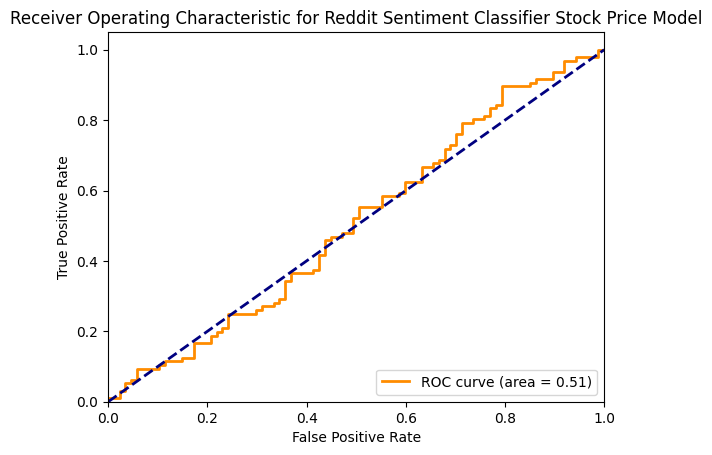

In [208]:
fpr, tpr, _ = roc_curve(complete_df['Movement'], probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Step 5: Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Reddit Sentiment Classifier Stock Price Model')
plt.legend(loc="lower right")
plt.show()

In [169]:
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Mean Accuracy: 0.5078078078078079


In [81]:
posts.to_csv('nvidia_posts.csv')
comments.to_csv('nvidia_comments.csv')

In [166]:
complete_df.to_csv('complete_df.csv')

In [158]:
a_statistics.iloc[25:40]

Open        High         Low       Close     Volume  \
ticker time                                                                    
AAPL   2024-09-09  220.577324  221.026826  216.471840  220.667221   67180000   
       2024-09-10  218.679408  221.236593  216.491813  219.868103   51591000   
       2024-09-11  221.216620  222.844819  217.650536  222.415298   44587100   
       2024-09-12  222.255469  223.304319  219.578422  222.525177   37498200   
       2024-09-13  223.334293  223.793779  221.666130  222.255478   36766600   
       2024-09-16  216.302020  216.981280  213.684904  216.082275   59357400   
       2024-09-17  215.512892  216.661622  214.264266  216.551743   45519300   
       2024-09-18  217.310915  222.465248  217.300917  220.447464   59894900   
       2024-09-19  224.742744  229.567437  224.383139  228.618469   66781300   
       2024-09-20  229.717263  232.833829  227.369839  227.949203  318679900   
       2024-09-23  227.090154  229.197836  225.561837  226.221115   54146000   
       2024-09-24  228.398709  229.097952  225.481920  227.120117   43556100   
       2024-09-25  224.682796  227.040203  223.773808  226.121216   42308700   
       2024-09-26  227.050199  228.248877  225.162277  227.269958   36636700   
       2024-09-27  228.208935  229.267767  227.050206  227.539658   34026000   

                   Dividends  Stock Splits  
ticker time                                 
AAPL   2024-09-09        0.0           0.0  
       2024-09-10        0.0           0.0  
       2024-09-11        0.0           0.0  
       2024-09-12        0.0           0.0  
       2024-09-13        0.0           0.0  
       2024-09-16        0.0           0.0  
       2024-09-17        0.0           0.0  
       2024-09-18        0.0           0.0  
       2024-09-19        0.0           0.0  
       2024-09-20        0.0           0.0  
       2024-09-23        0.0           0.0  
       2024-09-24        0.0           0.0  
       2024-09-25        0.0           0.0  
       2024-09-26        0.0           0.0  
       2024-09-27        0.0           0.0

In [22]:
features = pd.read_csv('complete_df.csv')

In [9]:
features['Movement'] = (features['Open'] < features['Close']).astype(int)

In [4]:
features['Volume MA'] = features['Volume'].rolling(window=2).mean()

In [10]:
features['Previous Movement'] = features['Movement'].shift(1)

In [7]:
features['Previous Movement'][0] =

,ticker,time,post title sentiment_score,post body sentiment_score,comment sentiment_score,Open,High,Low,Close,Volume,Dividends,Stock Splits,Volume MA
0,AAPL,2024-09-16,0.262350,0.616633,0.422596,216.302020,216.981280,213.684904,216.082275,59357400,0.0,0.0,NaN
1,AAPL,2024-09-17,0.136886,0.535757,0.404554,215.512892,216.661622,214.264266,216.551743,45519300,0.0,0.0,52438350.0
2,AAPL,2024-09-18,0.413820,0.783610,0.489461,217.310915,222.465248,217.300917,220.447464,59894900,0.0,0.0,52707100.0
3,AAPL,2024-09-19,0.191500,0.505750,0.344883,224.742744,229.567437,224.383139,228.618469,66781300,0.0,0.0,63338100.0
4,AAPL,2024-09-20,0.247512,0.607288,0.382134,229.717263,232.833829,227.369839,227.949203,318679900,0.0,0.0,192730600.0


In [23]:
aapl = features.loc[features['ticker'] == 'AAPL']
nvda = features.loc[features['ticker'] == 'NVDA']

In [40]:
aapl['Movement'] = (aapl['Open'] < aapl['Close']).astype(int)
nvda['Movement'] = (nvda['Open'] < nvda['Close']).astype(int)

aapl['Previous Movement'] = aapl['Movement'].shift(1)
nvda['Previous Movement'] = nvda['Movement'].shift(1)

aapl['Volume MA'] = aapl['Volume'].rolling(window=2).mean()
nvda['Volume MA'] = nvda['Volume'].rolling(window=2).mean()

In [41]:
aapl['Volume MA'].fillna(500000, inplace=True)
nvda['Volume MA'].fillna(3000000, inplace=True)

aapl['Previous Movement'].fillna(0, inplace=True)
nvda['Previous Movement'].fillna(1, inplace=True)

<ipython-input-41-1baacabd4baa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aapl['Volume MA'].fillna(500000, inplace=True)
<ipython-input-41-1baacabd4baa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [42]:
complete_df = pd.concat([aapl, nvda], axis=0)

In [137]:
complete = pd.merge(sentiment, g_statistics, left_index=True, right_index=True, how='inner')

In [145]:
g_statistics.tail(50)

Open        High         Low       Close    Volume  \
ticker time                                                                   
MSFT   2024-09-16  429.739821  432.663960  427.364570  430.478333  13834700   
       2024-09-17  439.350600  440.967359  431.406479  434.280731  18874200   
       2024-09-18  434.131034  435.158975  429.550207  429.949402  18898000   
       2024-09-19  440.348594  440.618044  436.027227  437.813660  21706600   
       2024-09-20  436.346599  438.362553  433.352592  434.400482  55167100   
       2024-09-23  433.412463  435.588101  429.530250  432.644012  15128900   
       2024-09-24  432.135019  432.484326  425.248809  428.312683  17015800   
       2024-09-25  428.971351  432.254788  427.713889  431.246796  13396400   
       2024-09-26  434.220842  434.430414  428.272757  430.448395  14492000   
       2024-09-27  430.657956  430.987313  426.616058  427.164948  14896100   
       2024-09-30  427.354578  429.560185  424.520255  429.440399  16807300   
       2024-10-01  427.594117  427.624056  417.973360  419.849609  19092900   
       2024-10-02  421.735817  421.975358  415.877548  416.296722  16582300   
       2024-10-03  416.795735  418.711883  413.462411  415.707916  13686400   
       2024-10-04  417.404489  418.911482  414.141032  415.228851  19169700   
       2024-10-07  415.168980  416.276748  408.182964  408.721893  20919800   
       2024-10-08  410.079175  414.829676  407.354648  413.881561  19229300   
       2024-10-09  415.029228  419.540218  413.472347  416.626038  14974300   
       2024-10-10  414.400541  416.516301  412.324679  415.009308  13848400   
       2024-10-11  415.308709  416.296722  412.424468  415.488342  14144900   
       2024-10-14  416.935446  423.192940  416.685945  418.302734  16653100   
       2024-10-15  421.336634  421.636053  414.430475  417.903503  18900200   
       2024-10-16  414.340643  415.528238  409.660009  415.288727  15508900   
       2024-10-17  421.516260  421.655995  414.759795  415.887543  14820000   
       2024-10-18  416.306725  418.811690  415.428478  417.324677  17145300   
       2024-10-21  415.288731  418.123054  412.923470  417.943420  14206100   
       2024-10-22  417.654005  429.719850  417.204922  426.656006  25482200   
       2024-10-23  429.999274  430.218836  421.685928  423.751801  19654400   
       2024-10-24  424.480338  425.129064  421.556199  423.881561  13581600   
       2024-10-25  425.907501  431.655974  425.717878  427.294708  16899100   
       2024-10-28  430.797703  431.077142  425.448394  425.737823  14882400   
       2024-10-29  427.145006  432.304692  424.949389  431.087128  17644100   
       2024-10-30  436.566150  437.624030  431.236821  431.665955  29749100   
       2024-10-31  414.530250  415.328670  405.488351  405.538269  53971000   
       2024-11-01  408.192963  414.669989  406.685970  409.550232  24230400   
       2024-11-04  408.981363  409.600150  404.759832  407.644043  19672300   
       2024-11-05  407.554207  414.071161  407.264778  410.638031  17626000   
       2024-11-06  411.596129  419.610087  409.699901  419.340607  26681800   
       2024-11-07  420.438435  425.997316  419.041238  424.580139  19901800   
       2024-11-08  424.470368  425.648004  420.937431  421.695923  16891400   
       2024-11-11  421.675927  423.961361  415.168963  417.174957  24503300   
       2024-11-12  417.414486  423.592124  416.366596  422.184937  19401200   
       2024-11-13  420.797730  428.472341  417.374559  424.350616  21502200   
       2024-11-14  424.150992  427.314673  419.160981  426.037231  30246900   
       2024-11-15  418.981369  421.955396  412.813721  414.170990  28247600   
       2024-11-18  414.041237  417.564184  411.276782  414.929474  24742000   
       2024-11-19  412.284740  417.105108  410.727858  416.955414  18133500   
       2024-11-20  416.037221  416.456396  409.759778  414.659973  19191700   
       2024-11-21  419.500000  419.779999  410.290009  412.869995  20780200

In [146]:
complete['Movement'] = [0,0,0,0]
complete['Previous Movement'] = [0,0,1,1]
complete['Volume MA'] = [1750000,2300000,3800000,2100000]

#complete['Volume MA'].fillna(1100000, inplace=True)
#complete['Previous Movement'].fillna(1, inplace=True)

In [107]:
complete_df.set_index(['ticker', 'time'], inplace= True)

In [147]:
complete_df = pd.concat([complete_df, complete], axis=0)

In [148]:
complete_df

post title sentiment_score  \
ticker time                                              
AAPL   2024-09-16                             0.262350   
       2024-09-17                             0.136886   
       2024-09-18                             0.413820   
       2024-09-19                             0.191500   
       2024-09-20                             0.247512   
...                                                ...   
AMZN   2024-11-21 00:00:00                    0.000000   
MSFT   2024-10-02 00:00:00                    0.000000   
       2024-10-31 00:00:00                    0.636900   
       2024-11-04 00:00:00                    0.000000   
       2024-11-20 00:00:00                    0.051600   

                            post body sentiment_score  \
ticker time                                             
AAPL   2024-09-16                            0.616633   
       2024-09-17                            0.535757   
       2024-09-18                            0.783610   
       2024-09-19                            0.505750   
       2024-09-20                            0.607288   
...                                               ...   
AMZN   2024-11-21 00:00:00                   0.177900   
MSFT   2024-10-02 00:00:00                   0.000000   
       2024-10-31 00:00:00                   0.000000   
       2024-11-04 00:00:00                   0.692900   
       2024-11-20 00:00:00                   0.000000   

                            comment sentiment_score        Open        High  \
ticker time                                                                   
AAPL   2024-09-16                          0.422596  216.302020  216.981280   
       2024-09-17                          0.404554  215.512892  216.661622   
       2024-09-18                          0.489461  217.310915  222.465248   
       2024-09-19                          0.344883  224.742744  229.567437   
       2024-09-20                          0.382134  229.717263  232.833829   
...                                             ...         ...         ...   
AMZN   2024-11-21 00:00:00                -0.081720  203.490005  203.490005   
MSFT   2024-10-02 00:00:00                 0.145836  421.735817  421.975358   
       2024-10-31 00:00:00                 0.603129  414.530250  415.328670   
       2024-11-04 00:00:00                 0.155789  408.981363  409.600150   
       2024-11-20 00:00:00                 0.497800  416.037221  416.456396   

                                   Low       Close     Volume  Dividends  \
ticker time                                                                
AAPL   2024-09-16           213.684904  216.082275   59357400        0.0   
       2024-09-17           214.264266  216.551743   45519300        0.0   
       2024-09-18           217.300917  220.447464   59894900        0.0   
       2024-09-19           224.383139  228.618469   66781300        0.0   
       2024-09-20           227.369839  227.949203  318679900        0.0   
...                                ...         ...        ...        ...   
AMZN   2024-11-21 00:00:00  195.750000  198.380005   58800000        0.0   
MSFT   2024-10-02 00:00:00  415.877548  416.296722   16582300        0.0   
       2024-10-31 00:00:00  405.488351  405.538269   53971000        0.0   
       2024-11-04 00:00:00  404.759832  407.644043   19672300        0.0   
       2024-11-20 00:00:00  409.759778  414.659973   19191700        0.0   

                            Stock Splits  Movement    Volume MA  \
ticker time                                                       
AAPL   2024-09-16                    0.0       0.0     500000.0   
       2024-09-17                    0.0       1.0   52438350.0   
       2024-09-18                    0.0       1.0   52707100.0   
       2024-09-19                    0.0       1.0   63338100.0   
       2024-09-20                    0.0       0.0  192730600.0   
...                                  ...     

In [8]:
apple = pd.read_csv('nvidia_posts.csv')
apple.shape

(625, 5)

In [12]:
nvda_comments = pd.read_csv('nvidia_comments.csv')
nvda_comments.shape

(8482, 3)

In [15]:
nvda_comments.iloc[5:10]

,time,text,comment sentiment_score
5,2024-11-22,I can’t afford these new prices. I won’t be up...,0.0000
6,2024-11-22,"Demand is high, so we have to inflate prices t...",0.7402
7,2024-11-22,End of the day the consumer chips will sell li...,0.6705
8,2024-11-22,I might buy a 4070 or 80 here in the coming mo...,-0.2960
9,2024-11-22,The demand is staggering so we decided 5080 is...,-0.1280


In [16]:
complete_df = pd.read_csv('complete_df.csv')

In [25]:
complete_df.iloc[60:65, [0,1,2,3,4,12,13]]

,ticker,time,post title sentiment_score,post body sentiment_score,comment sentiment_score,Movement,Volume MA
60,NVDA,2024-09-19,-0.005967,0.157389,0.236748,1.0,301912650.0
61,NVDA,2024-09-20,0.316883,0.156633,0.200252,0.0,337984400.0
62,NVDA,2024-09-23,0.217262,0.241287,0.191633,0.0,294345450.0
63,NVDA,2024-09-24,-0.067292,0.121700,0.173573,1.0,280597650.0
64,NVDA,2024-09-25,0.204150,0.252038,0.175558,1.0,319829850.0
